# Segunda Entrega
---

<center><img src = "https://upload.wikimedia.org/wikipedia/commons/2/26/Spotify_logo_with_text.svg" width = 50% high = 50%><center>

## Índice
---

* [1. Introducción](#intro)
* [2. Contexto](#contexto)
* [3. Preguntas de interés](#preguntas)
* [4. Primera inspección de los datos](#inspeccion)
* [5. Data Cleaning](#cleaning)
    * [5.1. Datos nulos](#nulos)
    * [5.2. Datos duplicados](#duplicados)
* [6. Data Wrangling](#wrangling)
* [6. Popularidad](#popularidad)
    * [6.1. Géneros](#pop_generos)
    * [6.2. Artistas](#pop_artistas)
    * [6.3. Canciones](#pop_canciones)
* [7. Duración](#duracion)
* [8. Letras explícitas](#explicito)

## 1. Introducción <a class="anchor" id="intro"></a>
---
La industria de la música no es ajena a la innovación tecnológica: la revolución digital y la masificación del acceso del internet cambiaron las reglas del juego. Los servicios de streamming de música y podcasts hoy son la norma. Spotify, YouTube Music, Tidal y otros, compiten por liderar el mercado en donde implementar soluciones tecnológicas les permite destacarse por sobre las demás. Estos servicios deben atraer clientes y mantenerlos interesados mediante el uso sencillo e intuitivo de sus sistemas, de forma que les premita acceder a sus artistas y canciones favoritas mientras descubren nuevos géneros y tendencias musicales. Para dicha tarea son cruciales los sistemas de clasificación y recomendación de canciones en función de los gustos y preferencias de los clientes. En este terreno los algoritmos de aprendizaje automático lucen toda su potencia.

En el presente trabajo analizaremos una selección de canciones del servicio Spotify. Para ello, se realizará un análisis exploratorio para evaluar si la aplicación de algoritmos de clasificación y de clustering nos permitirian cumplir nuestros objetivos.

## 2. Contexto <a class="anchor" id="contexto"></a>
---

A los fines de atraer clientes y lograr su permanencia en el mismo, Spotify debe ofrecer una amplia variedad de géneros, artistas y canciones, junto con un sistema sencillo e intuitivo de usar. En este último ítem se encuentra el sistema de recomendación de canciones. Por otro lado, el servicio debe ser atractivo también para los artistas, atrayéndolos para que publiquen sus canciones en la plataforma. Para ello son cruciales los mecanismos que les den visibilidad dentro de la plataforma.

Surge la inquietud de definir un sistema de recomendación que fidelice tanto a los clientes como a los artistas. Para ello se propone un sistema de clasificación y de recomendación que ofrezca canciones que sean del agrado de los clientes y que además, recomiende canciones de artistas nuevos. El objetivo es ampliar el número de artistas que los clientes escuchan, encontrando el balance entre artistas nuevos y artistas ya establecidos. Lo anterior busca dar más visibilidad a los intérpretes a la vez que brinda novedades a los clientes, manteniendo así su atención.

El sistema de clasificación y de recomendación se basará fuertemente en las semejanzas y diferencias estadísticas y las correlaciones entre las variables que componen el dataset. La información disponible se analizará buscando identificar semejanzas y diferencias entre las canciones y géneros musicales, evaluando si estas podrían dar sustento al mencionado sistema de recomendación.

## 3. Preguntas de interés <a class="anchor" id="preguntas"></a>
---

Se plantean una serie de hipótesis que serán resueltas por medio del análisis exploratorio de datos. Las cuatro primeras hacen referencia a interrogantes sobre la factibilidad de desarrolar un sistema de clasificación y/o recomendación. En tanto que las últimas cinco son preguntas de caracter más comercial, extrayendo conclusiones que redunden en una mejor comprensión del comportamiento general del mercado musical. Sin embargo estas últimas preguntas pueden redundar en un mejor sistema de clasificación y/o recomendación.

- ¿Es la muestra representativa del total de las canciones del servicio Spotify?
- ¿Los datos están completos, sin duplicados, y bien formateados?
- ¿Hay diferencias estadísticas significativas entre las variables que clasifican las canciones?
- ¿Cuáles son las correlaciones en los diferentes parámetros?

* ¿Cuáles son los géneros más populares?
* ¿Cuáles son los artistas más populares?
* ¿En que variable se destacan las canciones más populares?
* ¿Qué porcentaje de las canciones tienen letras explícitas?
* ¿Cual es la duración promedio de las canciones?

Estas hipótesis no serán respondidas en el orden en el que fueron planteadas sino de manera orgánica a medida que los datos son analizados.

<center><img src = "https://storage.googleapis.com/pr-newsroom-wp/1/2021/09/ehance-video-cover.png" width = 60% high = 60%><center>

## 4. Primera inspección de los datos <a class="anchor" id="inspeccion"></a>
---

In [3]:
import matplotlib.pyplot as plt
import missingno as msno
import numpy as np
import pandas as pd
import seaborn as sns
from statistics import median
from wordcloud import WordCloud

In [4]:
df = pd.read_csv('Spotify_Track_Dataset.csv')
df_api = pd.read_csv('Spotify_API.csv')

In [5]:
print(df.shape, df_api.shape)

(114000, 21) (8598, 19)


In [6]:
df.head(3)

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.461,...,-6.746,0,0.1430,0.0322,0.000001,0.358,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.166,...,-17.235,1,0.0763,0.9240,0.000006,0.101,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.359,...,-9.734,1,0.0557,0.2100,0.000000,0.117,0.120,76.332,4,acoustic


In [7]:
df_api.head(3)

,Unnamed: 0,year,artist,track,id,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0,1980,AC/DC,You Shook Me All Night Long,2SiXAy7TuUkycRVbbWDEpo,80,0.532,0.767,7,-5.509,1,0.0574,0.00287,0.000513,0.3900,0.755,127.361,210173,4
1,1,1980,AC/DC,Back In Black,08mG3Y1vljYA6bvDt4Wqkj,82,0.310,0.700,9,-5.678,1,0.0470,0.01100,0.009650,0.0828,0.763,188.386,255493,4
2,2,1980,Daryl Hall & John Oates,You Make My Dreams (Come True),4o6BgsqLIBViaGVbx5rbRk,77,0.751,0.501,5,-12.151,1,0.0551,0.23400,0.112000,0.0467,0.902,167.057,190627,4


El dataset está compuesto por una muestra de 114.000 canciones, la cual cada una de ellas es descripta por 21 variables. Entre dichas variables se encuentra el nombre de la canción, su intérprete, álbum, duración y una serie de parámetros numéricos que dan información sobre el volumen, la energía que transmite, el carácter instrumental, la presencia de palabra hablada o cantanda, entre otras. A continuación se describen algunas de las variables, principalmente aquellas de significados complejos.

- popularity: Popularidad de la canción, toma valores entre 0 y 100, siendo 100 el más popular. 
- explicit: Informa si la canción posee letras explícitas o no.
- danceability: Describe cuan bailable es una canción. 0 indica poco bailable y 1 indica muy bailable.
- energy: Es una medida de la intensidad. Canciones energéticas se sienten rápidas, de volumen alto y ruidosas.
- loudness: Volumen promedio de la canción en decibelios.
- speechiness: Detecta la presencia de palabra hablada. Mientras más palabra hablada posea, más cerca de 1 estará el valor.
- acousticness: Medida desde 0.0 a 1.0 sobre si la canción es acústica, indicando 1.0 que la canción es acústica.
- instrumentalness: Predice si la canción no contiene voces. Mientras más cerca esté de 1.0, mayor es la posibilidad que la canción no contenga voces.
- liveness: Detecta la presencia de audiencia en las canciones. Altos valores indican alta posibilidad de que el tema se interpretó en vivo.
- valence: Medida desde 0.0 a 1.0 describiendo la positividad musical que la canción porta. Canciones con alta valencia suenan más positivas, mientras la baja valencia indica temas más negativos.

In [8]:
print(df['track_genre'].unique())

['acoustic' 'afrobeat' 'alt-rock' 'alternative' 'ambient' 'anime'
 'black-metal' 'bluegrass' 'blues' 'brazil' 'breakbeat' 'british'
 'cantopop' 'chicago-house' 'children' 'chill' 'classical' 'club' 'comedy'
 'country' 'dance' 'dancehall' 'death-metal' 'deep-house' 'detroit-techno'
 'disco' 'disney' 'drum-and-bass' 'dub' 'dubstep' 'edm' 'electro'
 'electronic' 'emo' 'folk' 'forro' 'french' 'funk' 'garage' 'german'
 'gospel' 'goth' 'grindcore' 'groove' 'grunge' 'guitar' 'happy'
 'hard-rock' 'hardcore' 'hardstyle' 'heavy-metal' 'hip-hop' 'honky-tonk'
 'house' 'idm' 'indian' 'indie-pop' 'indie' 'industrial' 'iranian'
 'j-dance' 'j-idol' 'j-pop' 'j-rock' 'jazz' 'k-pop' 'kids' 'latin'
 'latino' 'malay' 'mandopop' 'metal' 'metalcore' 'minimal-techno' 'mpb'
 'new-age' 'opera' 'pagode' 'party' 'piano' 'pop-film' 'pop' 'power-pop'
 'progressive-house' 'psych-rock' 'punk-rock' 'punk' 'r-n-b' 'reggae'
 'reggaeton' 'rock-n-roll' 'rock' 'rockabilly' 'romance' 'sad' 'salsa'
 'samba' 'sertanejo' 'show

In [9]:
df.groupby('track_genre').size()

track_genre
acoustic       1000
afrobeat       1000
alt-rock       1000
alternative    1000
ambient        1000
               ... 
techno         1000
trance         1000
trip-hop       1000
turkish        1000
world-music    1000
Length: 114, dtype: int64

Se observa que el dataset está compuesto por mil canciones de cada género musical, esto puede ser positivo por implica que ningun género quede subrepresentado. Leyendo la lista de géneros presentes en el dataset encontramos los géneros más masivos, al menos en Argentina, por ejemplo: rock, pop, hip-hp, latino, reggae, reggaeton, etcétera. Además, el número de canciones es suficiente para obtener buenos parámetros estadísticos de cada género que asistan posteriormente a la formación de un sistema de clasificación.

## 5. Data Cleaning <a class="anchor" id="cleaning"></a>
---

El funcionamiento de los algoritmos depende de poseer información libre de valores nulos y repetidos, las siguientes dos subsecciones se focalizan rápidamente en dichos asuntos.

### 5.1. Datos nulos <a class="anchor" id="nulos"></a>

In [10]:
df = df.dropna()

### 5.2. Datos duplicados <a class="anchor" id="duplicados"></a>

In [11]:
df.duplicated(subset = ['track_id']).value_counts()

False    89740
True     24259
dtype: int64

In [12]:
df = df.drop_duplicates(subset = ['track_id'])

El total de canciones repetidas asciende a 24259, de un total de 114.000, lo cual es el 21% del dataset, un número realmente alto. Sin embargo, al igual que con los valores tipo NaN, borramos los valores repetidos en el dataset.

## 6. Data Wrangling <a class="anchor" id="wrangling"></a>
---

In [13]:
def wrangling(data):
    
    if 'track_id' in data.columns:
        data.drop(['Unnamed: 0', 'track_id'], axis = 1, inplace = True)
        
        # Eliminamos los artistas secundarios
        data[['artists', 'artists_1']] = data['artists'].str.split(';', n = 1, expand = True)
        data.drop('artists_1', axis = 1, inplace = True)
        
    else:
        data.drop(['Unnamed: 0', 'id'], axis = 1, inplace = True)
        data.rename(columns = {'artist':'artists'}, inplace = True)
        
    # Pasamos de ms a minutos
    data['duration_min'] = (data['duration_ms']/(60 * 1000)).round(2)
    data.drop('duration_ms', axis = 1, inplace = True)

    # Expresamos el volumen en números positivos
    data['loudness_db'] = - data['loudness']
    data.drop('loudness', axis = 1, inplace = True)

    return data

In [14]:
df = wrangling(df)
df_api = wrangling(df_api)

Se eliminaron las columnas "Unnamed: 0", "track_id" e "id" que sólo indica el número de fila y que identifica la canción en el servicio Spotify, respectivamente. Se expresó la duración de las canciones en minutos (en lugar de milisegundos) y se modificó la columna "loudness" para que informe valores positivos. Por último, en el caso que una canción posea más de un intérprete, la columna "artists" presenta a los artistas separados por punto y coma (;), por ello se separa las artistas y se selecciona sólo el principal.

In [15]:
df_api.head()

,year,artists,track,popularity,danceability,energy,key,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration_min,loudness_db
0,1980,AC/DC,You Shook Me All Night Long,80,0.532,0.767,7,1,0.0574,0.00287,0.000513,0.3900,0.755,127.361,4,3.50,5.509
1,1980,AC/DC,Back In Black,82,0.310,0.700,9,1,0.0470,0.01100,0.009650,0.0828,0.763,188.386,4,4.26,5.678
2,1980,Daryl Hall & John Oates,You Make My Dreams (Come True),77,0.751,0.501,5,1,0.0551,0.23400,0.112000,0.0467,0.902,167.057,4,3.18,12.151
3,1980,Queen,Another One Bites The Dust - Remastered 2011,72,0.933,0.528,5,0,0.1620,0.11200,0.329000,0.1630,0.756,109.975,4,3.58,6.472
4,1980,Bob Marley & The Wailers,Could You Be Loved,79,0.916,0.720,0,1,0.1000,0.36000,0.000160,0.0958,0.760,103.312,4,3.95,8.548


## 6. Popularidad <a class="anchor" id="popularidad"></a>
---

En esta sección se analizan los géneros, artistas y canciones de mayor popularidad en el dataset.

### 6.1. Géneros <a class="anchor" id="pop_generos"></a>

In [17]:
print('Hay {} géneros en el dataset'.format(df['track_genre'].unique().size))

Hay 113 géneros en el dataset


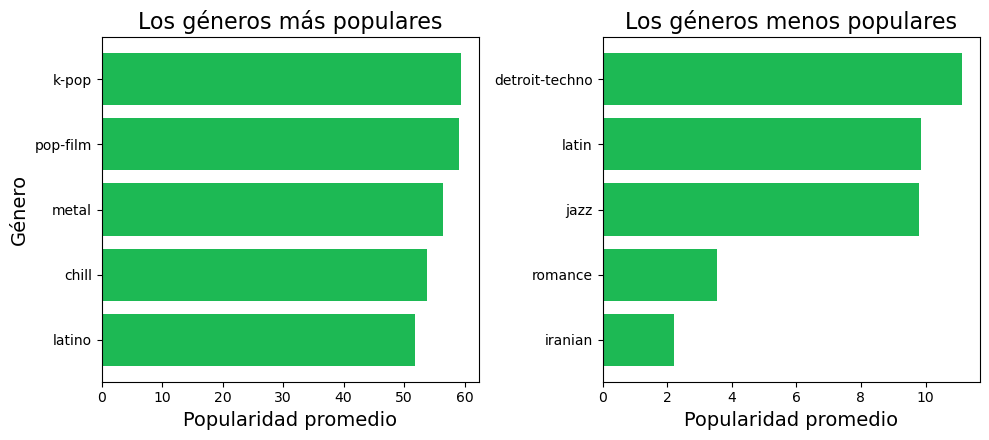

In [18]:
popularity_mean = df['popularity'].groupby(df['track_genre']).mean()
most_popular_genres = popularity_mean.sort_values(ascending = False).head(5)
least_popular_genres = popularity_mean.sort_values(ascending = False).tail(5)

fig, axs = plt.subplots(1, 2, figsize = (10, 4.5))

axs[0].barh(most_popular_genres.index[::-1], most_popular_genres[::-1], color = '#1DB954')
axs[1].barh(least_popular_genres.index[::-1], least_popular_genres[::-1], color = '#1DB954')

axs[0].set_xlabel('Popularidad promedio', fontsize = 14)
axs[1].set_xlabel('Popularidad promedio', fontsize = 14)
axs[0].set_ylabel('Popularidad promedio', fontsize = 14)
axs[0].set_ylabel('Género', fontsize = 14)
axs[1].set_title('Los géneros menos populares', fontsize = 16)
axs[0].set_title('Los géneros más populares', fontsize = 16)

plt.tight_layout()
# plt.savefig('Popularidad genero.jpg', dpi = 300)
plt.show()

Se observa que 113 géneros componen el dataset, presentando géneros tan diversos tales como "k-pop", "detroit-techno" y "chill". Los géneros de mayor popularidad promedio poseen todos más de 50 puntos, presentando diversidad de géneros. Dicha diversidad tambien está presente en los géneros menos populares, poseeyendo valores en torno los 10 puntos de popularidad promedio.

### 6.2. Artistas <a class="anchor" id="pop_artistas"></a>

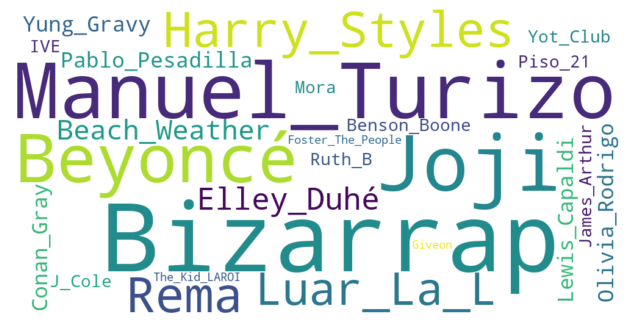

In [27]:
popular_artists = df['popularity'].groupby(df['artists']).mean()
most_popular_artists = popular_artists.sort_values(ascending = False).head(25)

text = list(most_popular_artists.index)
text2 = [text[i].replace(' ', '_').replace('.', '') for i in range(len(text))]

string = (" ").join(text2)

wordcloud = WordCloud(width = 1000, height = 500, background_color = 'white').generate(string)

plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")

plt.tight_layout()
# plt.savefig('Popularidad artistas.jpg', dpi = 300)
plt.show()

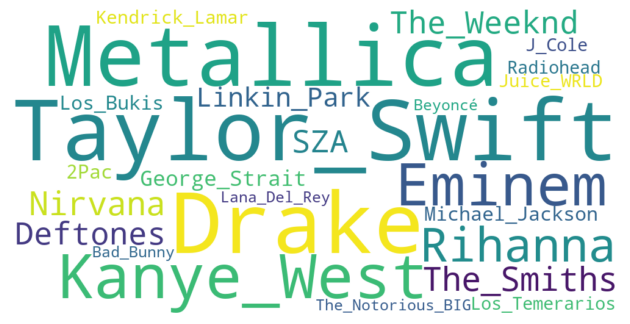

In [29]:
alltime_popular_artists = df_api['artists'].value_counts().head(25)

text = list(alltime_popular_artists.index)
text2 = [text[i].replace(' ', '_').replace('.', '') for i in range(len(text))]

string = (" ").join(text2)

wordcloud = WordCloud(width = 1000, height = 500, background_color = 'white').generate(string)

plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")

plt.tight_layout()
# plt.savefig('Popularidad artistas.jpg', dpi = 300)
plt.show()

### 6.3. Canciones <a class="anchor" id="pop_canciones"></a>

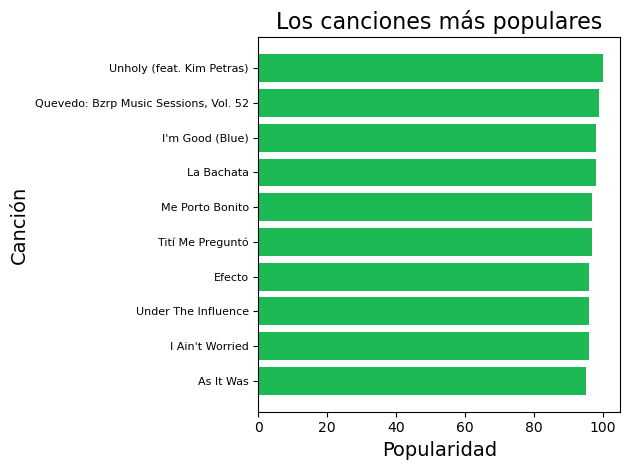

In [20]:
df2 = df[['artists', 'popularity', 'track_name', 'track_genre']].sort_values(['popularity'], ascending = False).head(10)

plt.barh(df2['track_name'][::-1], df2['popularity'][::-1], color = '#1DB954')
plt.xlabel('Popularidad', fontsize = 14)
plt.ylabel('Canción', fontsize = 14)
plt.yticks(fontsize = 8)
plt.title('Los canciones más populares', fontsize = 16)

plt.tight_layout()
# plt.savefig('Popularidad canciones.jpg', dpi = 300)
plt.show()

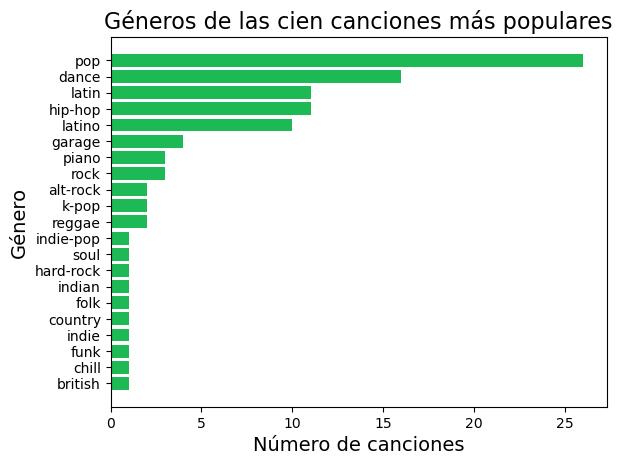

In [22]:
df3 = df[['artists', 'popularity', 'track_name', 'track_genre']].sort_values(['popularity'], ascending = False).head(100)
popular_songs_genre = df3['track_genre'].value_counts()

plt.barh(popular_songs_genre.index[::-1], popular_songs_genre[::-1], color = '#1DB954')
plt.xlabel('Número de canciones', fontsize = 14)
plt.ylabel('Género', fontsize = 14)
plt.title('Géneros de las cien canciones más populares', fontsize = 16)
# plt.savefig('Popularidad genero 2.jpg', dpi = 300)
plt.show()

La duración de las canciones presenta esta distribución, con una mediana en torno a los 3,6 minutos, aunque hay canciones que superan holgadamente los 15 minutos que abarca este gráfico.

## 8. Letras explicítas <a class="anchor" id="explicito"></a>
---

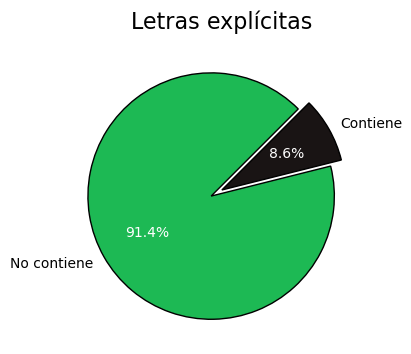

In [25]:
plt.figure(figsize = (4,4))
_, _, autotexts = plt.pie(df.groupby('explicit').size(), labels = ('No contiene', 'Contiene'), explode = (0.1, 0), startangle = 45, autopct = '%1.1f%%', colors = ['#1DB954', '#191414'], wedgeprops = {"edgecolor" : "black", 'linewidth': 1})
for ins in autotexts:
    ins.set_color('white')

plt.title('Letras explícitas', fontsize = 16)
# plt.savefig('Letras explicitas.jpg', dpi = 300)
plt.show()

## 8. Evolucion con el tiempo <a class="anchor" id="tiempo"></a>
---

In [39]:
year, popularity, danceability, energy, tempo, valence = [], [], [], [], [], []

for i in range(1980, 2023):
    year.append(i)
    popularity.append(np.mean(df_api.loc[df_api['year'] == i]['popularity']))
    danceability.append(np.mean(df_api.loc[df_api['year'] == i]['danceability']))
    energy.append(np.mean(df_api.loc[df_api['year'] == i]['energy']))
    tempo.append(np.mean(df_api.loc[df_api['year'] == i]['tempo']))
    valence.append(np.mean(df_api.loc[df_api['year'] == i]['valence']))

df_api_avg = pd.DataFrame({'year':year, 'popularity':popularity, 'danceability':danceability, 'energy':energy, 'tempo':tempo, 'valence':valence})

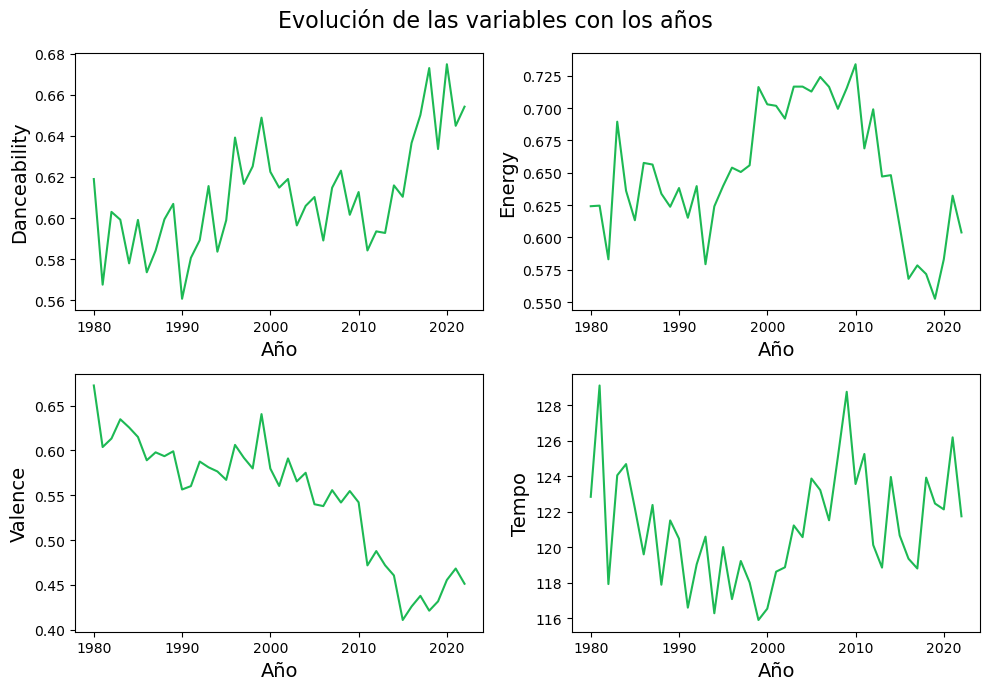

In [76]:
fig, axs = plt.subplots(2, 2, figsize = (10, 7))

axs[0,0].plot(df_api_avg['year'], df_api_avg['danceability'], c = '#1DB954')
axs[0,1].plot(df_api_avg['year'], df_api_avg['energy'], c = '#1DB954')
axs[1,0].plot(df_api_avg['year'], df_api_avg['valence'], c = '#1DB954')
axs[1,1].plot(df_api_avg['year'], df_api_avg['tempo'], c = '#1DB954')

variable = ['Danceability', 'Energy', 'Valence', 'Tempo']

for i, ax in enumerate(axs.flat):
    ax.set_xlabel('Año', fontsize = 14)
    ax.set_ylabel(f'{variable[i]}', fontsize = 14)
    
fig.suptitle('Evolución de las variables con los años', fontsize = 16)

plt.tight_layout()
plt.show()